# Improve a model

First predictions = baseline predictions
First model = naseline model

From a data perspective:
* Could we collecte more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model?
* Could we improve the current model?

Hyperparameters vs Parameters

Parameters = model find these patterns in data

Hyperparameters = settings on a model you can adjust to (protentially)
improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Tuning Hyperparameters by hand

Let's make 3 sets, training, validation and test.

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimator`

In [42]:
# create model evaluation function
def evaluate_preds(y_true, y_pred):
    """
    Performs evaluation comparison on y_true labels vs y_pred labels
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    metric_dict = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return metric_dict

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Shuffle the data
heart_disease = pd.read_csv("../data/heart-disease.csv")
np.random.seed(42)
heart_disease.shape
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]
# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
# Fit the model on the training set
clf.fit(X_train, y_train)
# Make predictions on the validation set
y_preds = clf.predict(X_test)
# Evaluate the model on the validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Accuracy: 81.97%
Precision: 0.76
Recall: 0.90
F1 Score: 0.83


In [44]:
# create a second calssifier with different hyperparameters
clf_2 = RandomForestClassifier(max_depth=10, n_estimators=200)
# Fit the second classifier on the training set
clf_2.fit(X_train, y_train)
# Make predictions on the validation set with the second classifier
y_preds_2 = clf_2.predict(X_test)
# Evaluate the second classifier on the validation set
clf_2_metrics = evaluate_preds(y_test, y_preds_2)

Accuracy: 81.97%
Precision: 0.75
Recall: 0.93
F1 Score: 0.83


In [45]:
# Compare the metrics of both classifiers
for metric in baseline_metrics:
    baseline_value = baseline_metrics[metric]
    clf_2_value = clf_2_metrics[metric]
    if clf_2_value > baseline_value:
        print(f"{metric} improved from {baseline_value:.2f} to {clf_2_value:.2f}")
    else:
        print(f"{metric} did not improve (baseline: {baseline_value:.2f}, new: {clf_2_value:.2f})")

accuracy did not improve (baseline: 0.82, new: 0.82)
precision did not improve (baseline: 0.76, new: 0.75)
recall improved from 0.90 to 0.93
f1 improved from 0.83 to 0.83


## Hyperparameter tuning with RandomizedSearchCV

In [46]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"],
}

# Instantiate RandomizedSearchCV
clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # Number of different combinations to try
                            cv=5,
                            verbose=True)
# Fit the RandomizedSearchCV model
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/annz/St

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=True)

In [47]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [48]:
# Make predictions with the best model
best_model = rs_clf.best_estimator_
y_preds = best_model.predict(X_test)
# Evaluate the best model
random_search_metrics = evaluate_preds(y_test, y_preds)
# Compare the metrics of the best model with the baseline
for metric in baseline_metrics:
    baseline_value = baseline_metrics[metric]
    random_search_metrics_value = random_search_metrics[metric]
    if random_search_metrics_value > baseline_value:
        print(f"{metric} improved from {baseline_value:.2f} to {random_search_metrics_value:.2f}")
    else:
        print(f"{metric} did not improve (baseline: {baseline_value:.2f}, new: {random_search_metrics_value:.2f})")

Accuracy: 81.97%
Precision: 0.75
Recall: 0.93
F1 Score: 0.83
accuracy did not improve (baseline: 0.82, new: 0.82)
precision did not improve (baseline: 0.76, new: 0.75)
recall improved from 0.90 to 0.93
f1 improved from 0.83 to 0.83


## Hyperparameter tuning with GridSearchCV

In [22]:
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt"],
}

# 6*5*3*3*2 = 5400 combinations
# 5400 combinations * 5 folds = 27000 fits

In [53]:
grid2 = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None],
    "min_samples_split": [6],
    "min_samples_leaf": [1, 2],
    "max_features": ["auto", "sqrt"],
}
# 3*1*1*2*2 = 12 combinations
# 12 combinations * 5 folds = 60 fits

In [54]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

clf = RandomForestClassifier(n_jobs=1)

# Instantiate GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid2,
                      cv=5,
                      verbose=True,
                    )
# Fit the GridSearchCV model
gs_clf.fit(X_train, y_train)
# Make predictions with the best model from GridSearchCV
grid_search_model = gs_clf.best_estimator_
y_preds = grid_search_model.predict(X_test)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/annz/Study/Study/ML/ztm-ai/myvenv/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/Users/annz/St

In [55]:
# Evaluate the best model from GridSearchCV
grid_search_model_metrics = evaluate_preds(y_test, y_preds)
# Compare the metrics of the best model from GridSearchCV with the baseline
for metric in baseline_metrics:
    baseline_value = baseline_metrics[metric]
    grid_search_model_value = grid_search_model_metrics[metric]
    if grid_search_model_value > baseline_value:
        print(f"{metric} improved from {baseline_value:.2f} to {grid_search_model_value:.2f}")
    else:
        print(f"{metric} did not improve (baseline: {baseline_value:.2f}, new: {grid_search_model_value:.2f})")

Accuracy: 81.97%
Precision: 0.75
Recall: 0.93
F1 Score: 0.83
accuracy did not improve (baseline: 0.82, new: 0.82)
precision did not improve (baseline: 0.76, new: 0.75)
recall improved from 0.90 to 0.93
f1 improved from 0.83 to 0.83


## Compare different models metircs

<Axes: >

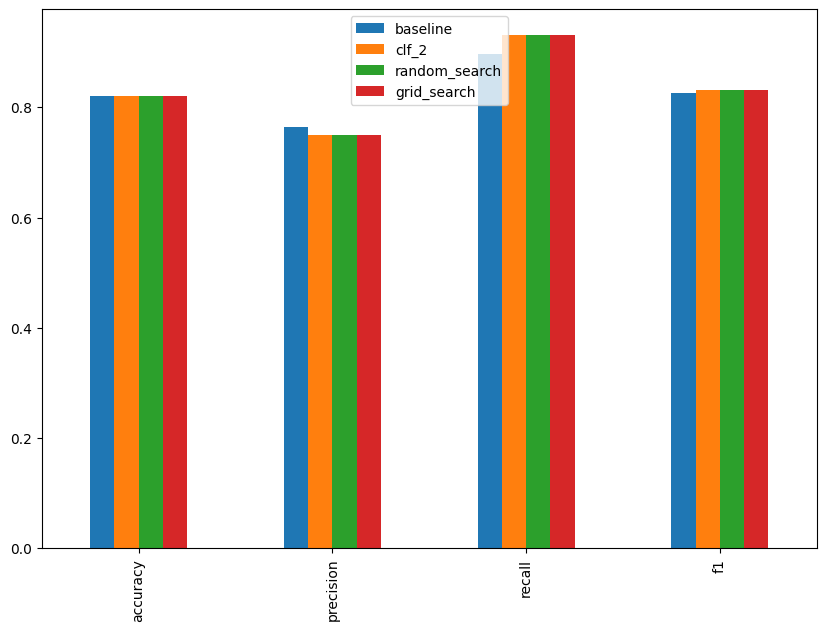

In [56]:
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "clf_2": clf_2_metrics,
    "random_search": random_search_metrics,
    "grid_search": grid_search_model_metrics
})

compare_metrics.plot.bar(figsize=(10, 7))

## Save the load trained machine learning models

- With Python's `pickle` module
- With the `joblib` module

### Pickle

In [57]:
import pickle
# Save the model to a file
pickle.dump(gs_clf, open("../models/heart-disease-gs-random-random-forest-model.pkl", "wb"))

In [58]:
# Load the model from a file
loaded_model = pickle.load(open("../models/heart-disease-gs-random-random-forest-model.pkl", "rb"))
# Make predictions with the loaded model
loaded_model_preds = loaded_model.predict(X_test)
# Evaluate the loaded model
loaded_model_metrics = evaluate_preds(y_test, loaded_model_preds)

Accuracy: 81.97%
Precision: 0.75
Recall: 0.93
F1 Score: 0.83


### Joblib

In [60]:
from joblib import dump, load
# Save the best model from RandomizedSearchCV
dump(rs_clf, "../models/heart-disease-rs-random-forest-model.joblib")
# Load the best model from RandomizedSearchCV
loaded_rs_model = load("../models/heart-disease-rs-random-forest-model.joblib")
# Make predictions with the loaded model
loaded_rs_model_preds = loaded_rs_model.predict(X_test)
# Evaluate the loaded model
loaded_rs_model_metrics = evaluate_preds(y_test, loaded_rs_model_preds)

Accuracy: 81.97%
Precision: 0.75
Recall: 0.93
F1 Score: 0.83
